In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
import seaborn as sns

In [0]:
#Data reading and cleaning
derm = pd.read_csv('dermatology.data',header = None)
for column in derm:
    derm = derm[derm[column]!='?']
derm = derm.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
X = derm.drop([34],axis = 1)
y = derm[34]

In [0]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.33,random_state = 42)
data_index = len(X_test)

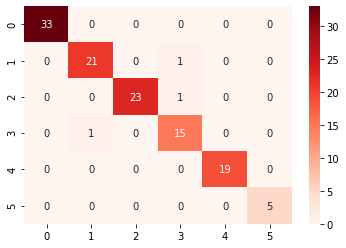

In [0]:
#Logistic Regression
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train,y_train)
log_pred = logreg.predict(X_test) 
log_scores = {'Accuracy':logreg.score(X_test,y_test),'Precision': precision_score(log_pred,y_test,average='macro'),
              'Recall':recall_score(log_pred,y_test,average='macro'),'F1':f1_score(log_pred,y_test,average='macro')}
log_conf = confusion_matrix(y_test,log_pred)
sns.heatmap(log_conf, annot=True, fmt="g", cmap='Reds')

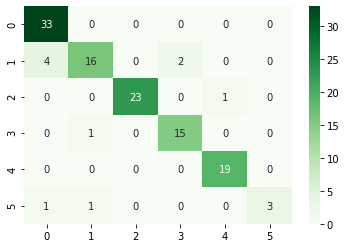

In [0]:
#Decision Tree
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
dec_pred = dec.predict(X_test)
dec.score(X_test,y_test)
dec_scores = {'Accuracy':dec.score(X_test,y_test),'Precision': precision_score(dec_pred,y_test,average='macro'),
              'Recall':recall_score(dec_pred,y_test,average='macro'),'F1':f1_score(dec_pred,y_test,average='macro')}
dec_conf = confusion_matrix(y_test,dec_pred)
sns.heatmap(dec_conf, annot=True, fmt="g", cmap='Greens')

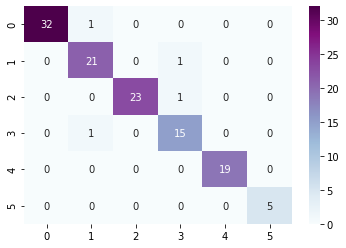

In [0]:
#SVM
'''
svm1 = svm.SVC()
svm1.fit(X_train,y_train)
print(svm1.score(X_test,y_test))
'''
svm2 = svm.LinearSVC(max_iter  = 100000)
svm2.fit(X_train,y_train)
svc_pred = svm2.predict(X_test)
svc_scores = {'Accuracy':svm2.score(X_test,y_test),'Precision': precision_score(svc_pred,y_test,average='macro'),
              'Recall':recall_score(svc_pred,y_test,average='macro'),'F1':f1_score(svc_pred,y_test,average='macro')}
'''
svm3 = svm.SVC(kernel = 'rbf',max_iter  = 10000)
svm3.fit(X_train,y_train)
print(svm3.score(X_test,y_test))
'''
svm_conf = confusion_matrix(y_test,svc_pred)
sns.heatmap(svm_conf, annot=True, fmt="g", cmap='BuPu')

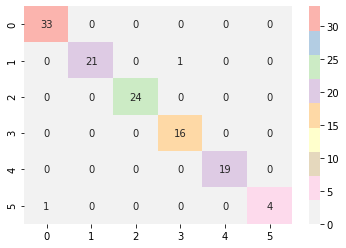

In [0]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_scores = {'Accuracy':rf.score(X_test,y_test),'Precision': precision_score(rf_pred,y_test,average='macro'),
              'Recall':recall_score(rf_pred,y_test,average='macro'),'F1':f1_score(rf_pred,y_test,average='macro')}
rf_conf = confusion_matrix(y_test,rf_pred)
sns.heatmap(rf_conf, annot=True, fmt="g", cmap='Pastel1_r')

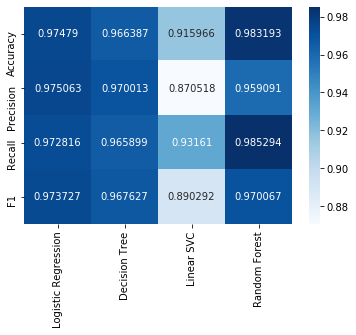

In [0]:
score_df = pd.DataFrame([log_scores, svc_scores,dec_scores,rf_scores]).T
score_df.columns = ['Logistic Regression','Decision Tree','Linear SVC','Random Forest']
sns.heatmap(score_df, annot=True, fmt="g", cmap='Blues')

In [0]:
log_dic = dict(zip(list(range(1,data_index)),log_pred))
dec_dic = dict(zip(list(range(1,data_index)),dec_pred))
svc_dic = dict(zip(list(range(1,data_index)),svc_pred))
rf_dic = dict(zip(list(range(1,data_index)),rf_pred))
true_dic = dict(zip(list(range(1,data_index)),y_test))

In [0]:
def clf_vs_true_plot(pred_dic, name):
    plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    plt.title(name)
    plt.xlabel('Data Row')
    plt.ylabel('Class value')
    plt.ylim(0,7)
    plt.scatter(*zip(*sorted(pred_dic.items())),label='Predicted Classes',color = 'red')
    plt.scatter(*zip(*sorted(true_dic.items())),label='True classes',color = 'blue')
    plt.legend(loc = 'upper right')
    plt.show()


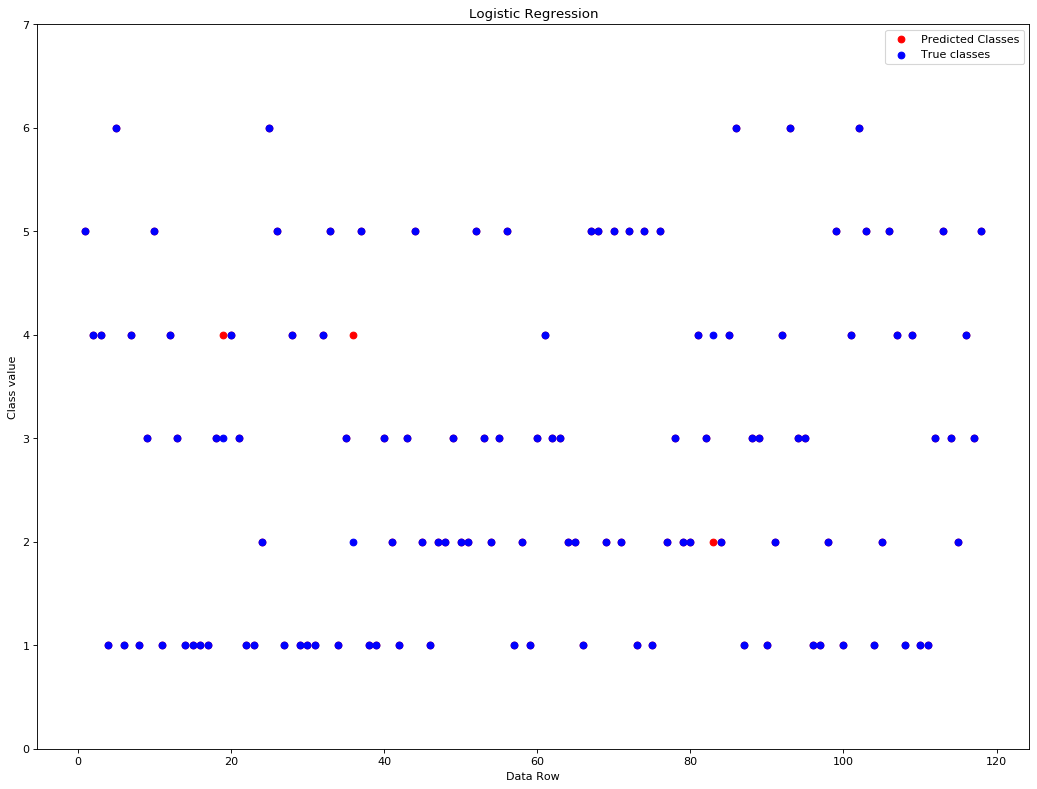

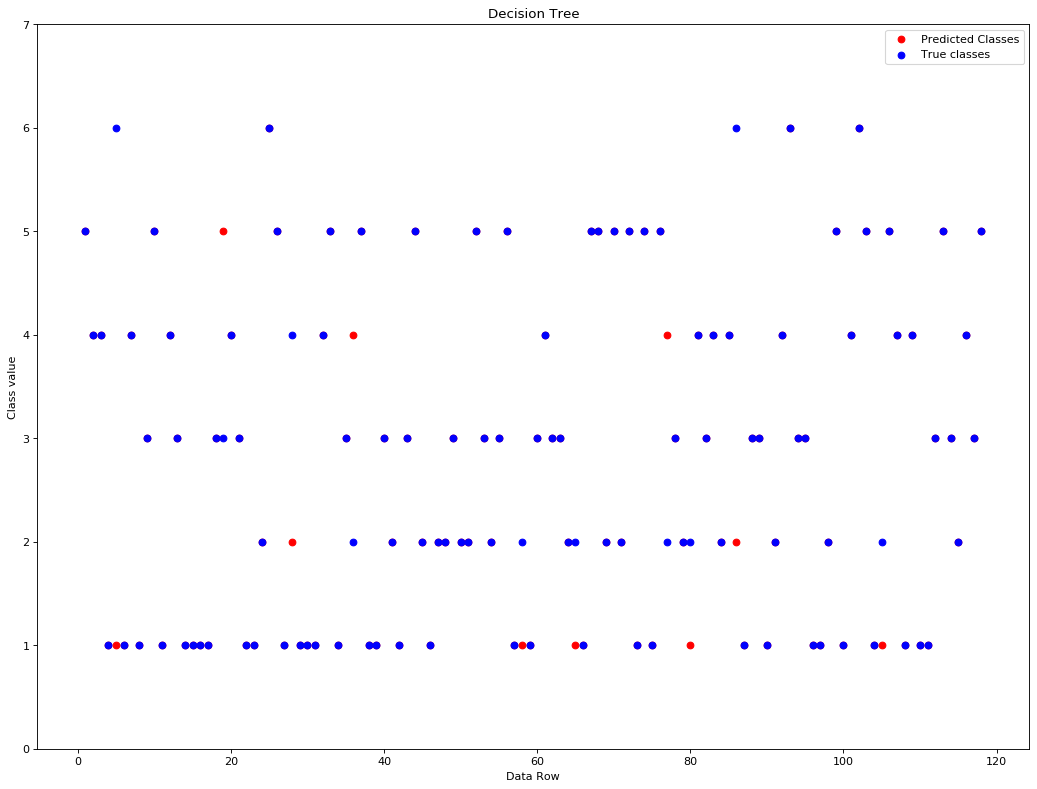

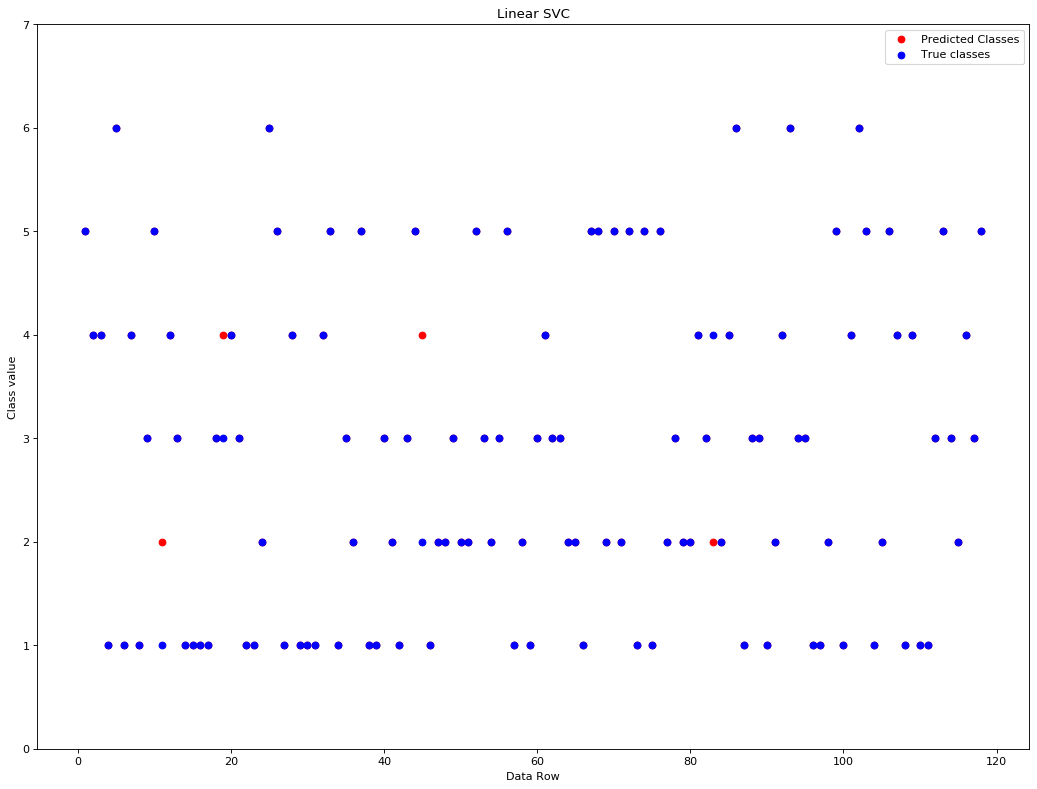

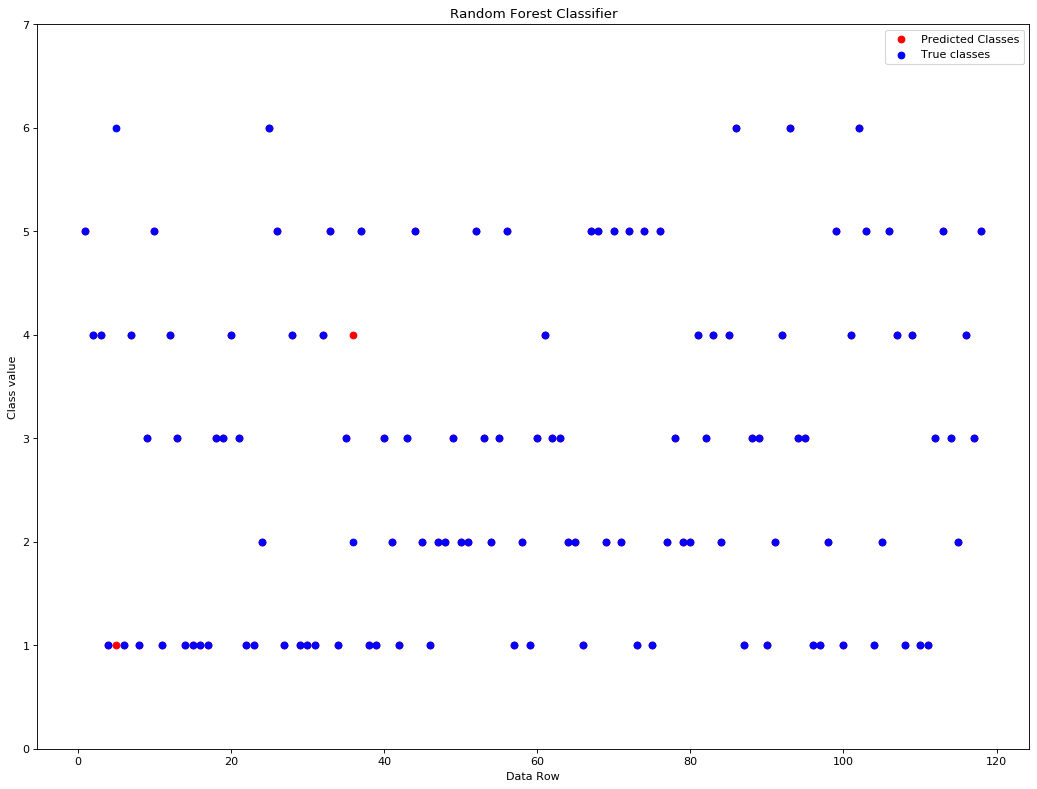

In [0]:
clf_vs_true_plot(log_dic,'Logistic Regression')
clf_vs_true_plot(dec_dic,'Decision Tree')
clf_vs_true_plot(svc_dic,'Linear SVC')
clf_vs_true_plot(rf_dic,'Random Forest Classifier')